In [1]:
gtex_folder = "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/"
head(list.files(gtex_folder,".egenes.txt"))

[1] "Adipose_Subcutaneous.v7.egenes.txt"    
[2] "Adipose_Visceral_Omentum.v7.egenes.txt"
[3] "Adrenal_Gland.v7.egenes.txt"           
[4] "Artery_Aorta.v7.egenes.txt"            
[5] "Artery_Coronary.v7.egenes.txt"         
[6] "Artery_Tibial.v7.egenes.txt"

In [2]:
files = paste0(gtex_folder, list.files(gtex_folder,".egenes.txt"))
length(files)
head(files,2)

[1] 48

[1] "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/Adipose_Subcutaneous.v7.egenes.txt"    
[2] "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/Adipose_Visceral_Omentum.v7.egenes.txt"

In [3]:
brain_files = files[grep("Brain",files)]
head(brain_files,2)
length(brain_files)
# 
non_brain_files = files[!(files %in% brain_files)]
head(non_brain_files,2)
length(non_brain_files)

[1] "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/Brain_Amygdala.v7.egenes.txt"                      
[2] "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/Brain_Anterior_cingulate_cortex_BA24.v7.egenes.txt"

[1] 13

[1] "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/Adipose_Subcutaneous.v7.egenes.txt"    
[2] "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/Adipose_Visceral_Omentum.v7.egenes.txt"

[1] 35

In [4]:
eqtls = c()
for (file in non_brain_files){
    df = read.csv(file, sep = "\t")
    df$feature_id = gsub("\\..*","",df$gene_id)
    df$snp_id = gsub("_b37","",df$variant_id)
    df0 = df[df$qval<0.05,]
    df0$eqtl = paste0(df0$feature_id,"-",df0$snp_id)
    eqtls = unique(c(eqtls, df0$eqtl))
}
eqtl_non_brain = eqtls

In [ ]:
eqtls = c()
for (file in brain_files){
    df = read.csv(file, sep = "\t")
    df$feature_id = gsub("\\..*","",df$gene_id)
    df$snp_id = gsub("_b37","",df$variant_id)
    df0 = df[df$qval<0.05,]
    df0$eqtl = paste0(df0$feature_id,"-",df0$snp_id)
    eqtls = unique(c(eqtls, df0$eqtl))
}
eqtl_brain = eqtls

In [ ]:
length(eqtl_brain)
length(eqtl_non_brain)

In [ ]:
eqtl_brain_only = eqtl_brain[!(eqtl_brain %in% eqtl_non_brain)]
length(eqtl_brain_only)

In [ ]:
myfolder = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_results_nominal_significance_p_0.05/"

In [ ]:
neuro_files = paste0(myfolder,list.files(myfolder))
length(neuro_files)
head(neuro_files,2)

In [ ]:
nom_neuro_eqtls = c()
for (file in neuro_files){
    df = read.csv(file)
    df$eqtl = paste0(df$feature_id,"-",df$snp_id)
    nom_neuro_eqtls = unique(c(nom_neuro_eqtls, df$eqtl))
}

In [ ]:
df_d11 = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/genes_expressed_at_d11_old.csv")
genes_d11 = as.character(df_d11$genes)
length(genes_d11)
df_d30 = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/genes_expressed_at_d30_old.csv")
genes_d30 = as.character(df_d30$genes)
length(genes_d30)
df_d52 = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/genes_expressed_in_at_least_one_condition_d52_old.csv")
genes_d52 = as.character(df_d52$genes)
length(genes_d52)
all_genes = unique(c(genes_d11, genes_d30, genes_d52))
length(all_genes)

In [ ]:
df_d11 = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/genes_expressed_at_d11.csv")
genes_d11 = as.character(df_d11$genes)
length(genes_d11)
df_d30 = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/genes_expressed_at_d30.csv")
genes_d30 = as.character(df_d30$genes)
length(genes_d30)
df_d52 = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/genes_expressed_in_at_least_one_condition_d52.csv")
genes_d52 = as.character(df_d52$genes)
length(genes_d52)
all_genes = unique(c(genes_d11, genes_d30, genes_d52))
length(all_genes)

In [ ]:
# Substantia Nigra
sn_file = files[grep("nigra",files)]
sn_file

sn = read.csv(sn_file, sep ="\t")
sn$feature_id = gsub("\\..*","",sn$gene_id)
sn$snp_id = gsub("_b37","",sn$variant_id)
sn_sign = sn[sn$qval<0.05,]
sn_sign$eqtl = paste0(sn_sign$feature_id,"-",sn_sign$snp_id)
length(sn_sign$eqtl)

sn_eqtls = sn_sign$eqtl[!(sn_sign$eqtl %in% eqtl_non_brain)]
length(sn_eqtls)
# sn_eqtls = sn_sign$eqtl[sn_sign$eqtl %in% eqtl_brain_only]
# length(sn_eqtls)

In [70]:
sn_egenes = unique(sn_sign[sn_sign$eqtl %in% sn_eqtls,'feature_id'])
length(sn_egenes)

[1] 1156

In [71]:
length(sn_sign$feature_id[sn_sign$feature_id %in% all_genes]) # out of 1,807 (55%)
length(sn_egenes[sn_egenes %in% all_genes]) # out of 1,156 brain only (58%)

[1] 985

[1] 666

In [73]:
length(sn_sign$eqtl[sn_sign$eqtl %in% nom_neuro_eqtls]) # out of 985/1,807 (31%, 57%)
length(sn_eqtls[sn_eqtls %in% nom_neuro_eqtls]) # out of 666/1,156 (28%, 48%)

[1] 562

[1] 319

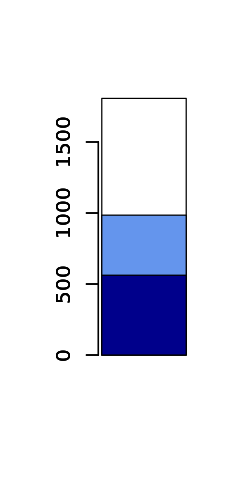

In [9]:
options(repr.plot.width = 2, repr.plot.height = 4)
# barplot(c(562,985,1807), col = c("darkblue","cornflowerblue","white"))
barplot(c(1807), col = c("white"))
barplot(c(985), col = c("cornflowerblue"), add = T)
barplot(c(562), col = c("darkblue"), add = T)

In [86]:
# Cerebellum
cb_file = files[grep("erebellu",files)]
cb_file

cb = read.csv(cb_file, sep ="\t")
cb$feature_id = gsub("\\..*","",cb$gene_id)
cb$snp_id = gsub("_b37","",cb$variant_id)
cb_sign = cb[cb$qval<0.05,]
cb_sign$eqtl= paste0(cb_sign$feature_id,"-",cb_sign$snp_id)
length(unique(cb_sign$eqtl))

[1] "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/Brain_Cerebellum.v7.egenes.txt"

[1] 8429

In [87]:
cb_eqtls = sn_sign$eqtl[!(cb_sign$eqtl %in% eqtl_non_brain)]
length(cb_eqtls)
cb_eqtls = cb_sign$eqtl[cb_sign$eqtl %in% eqtl_brain_only]
length(cb_eqtls)

[1] 6075

[1] 6075

In [88]:
cb_egenes = unique(cb_sign[cb_sign$eqtl %in% cb_eqtls,'feature_id'])
length(cb_egenes)

[1] 6075

In [89]:
length(cb_sign$feature_id[cb_sign$feature_id %in% all_genes]) # out of 8,429 (62%)
length(cb_egenes[cb_egenes %in% all_genes]) # out of 6,075 brain only (63%)

[1] 5204

[1] 3810

In [90]:
length(cb_sign$eqtl[cb_sign$eqtl %in% nom_neuro_eqtls]) # out of 5,204/8,429 (36%, 59%)
length(cb_eqtls[cb_eqtls %in% nom_neuro_eqtls]) # out of 3,810/6,075 (34, 54%)

[1] 3071

[1] 2071

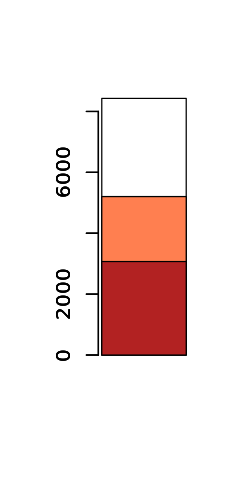

In [10]:
options(repr.plot.width = 2, repr.plot.height = 4)
# barplot(c(562,985,1807), col = c("darkblue","cornflowerblue","white"))
barplot(c(8429), col = c("white"))
barplot(c(5204), col = c("coral"), add = T)
barplot(c(3071), col = c("firebrick"), add = T)

In [79]:
brain_files

[1] "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/Brain_Amygdala.v7.egenes.txt"                       
 [2] "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/Brain_Anterior_cingulate_cortex_BA24.v7.egenes.txt" 
 [3] "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/Brain_Caudate_basal_ganglia.v7.egenes.txt"          
 [4] "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/Brain_Cerebellar_Hemisphere.v7.egenes.txt"          
 [5] "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/Brain_Cerebellum.v7.egenes.txt"                     
 [6] "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/Brain_Cortex.v7.egenes.txt"                         
 [7] "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/Brain_Frontal_Cortex_BA9.v7.egenes.txt"             
 [8] "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/Brain_Hippocampus.v7.egenes.txt"                    
 [9] "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/Brain_Hypothalamus.v7.egenes.txt"                   
[10] "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/Brain_Nucleus_accumbens_basal_ganglia.v7.egenes.txt"
[11] "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/Brain_Putamen_basal_ganglia.v7.egenes.txt"          
[12] "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/Brain_Spinal_cord_cervical_c-1.v7.egenes.txt"       
[13] "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/Brain_Substantia_nigra.v7.egenes.txt"

In [91]:
# Frontal Cortex
fc_file = files[grep("Frontal_Cortex",files)]
fc_file

fc = read.csv(fc_file, sep ="\t")
fc$feature_id = gsub("\\..*","",fc$gene_id)
fc$snp_id = gsub("_b37","",fc$variant_id)
fc_sign = fc[fc$qval<0.05,]
fc_sign$eqtl= paste0(fc_sign$feature_id,"-",fc_sign$snp_id)
length(unique(fc_sign$eqtl))

[1] "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/Brain_Frontal_Cortex_BA9.v7.egenes.txt"

[1] 5086

In [92]:
fc_eqtls = sn_sign$eqtl[!(fc_sign$eqtl %in% eqtl_non_brain)]
length(fc_eqtls)
fc_eqtls = fc_sign$eqtl[fc_sign$eqtl %in% eqtl_brain_only]
length(fc_eqtls)

[1] 3690

[1] 3690

In [93]:
fc_egenes = unique(fc_sign[fc_sign$eqtl %in% fc_eqtls,'feature_id'])
length(fc_egenes)

[1] 3690

In [94]:
length(fc_sign$feature_id[fc_sign$feature_id %in% all_genes]) # out of 5,086 (60%)
length(fc_egenes[fc_egenes %in% all_genes]) # out of 3,690 brain only (61%)

[1] 3034

[1] 2266

In [95]:
length(fc_sign$eqtl[fc_sign$eqtl %in% nom_neuro_eqtls]) # out of 3,034/5,086 (29%, 49%)
length(fc_eqtls[fc_eqtls %in% nom_neuro_eqtls]) # out of 2,266/3,690 (25%, 40%)

[1] 1497

[1] 905

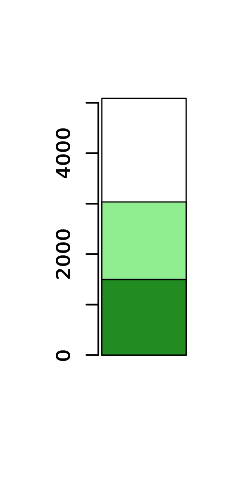

In [12]:
options(repr.plot.width = 2, repr.plot.height = 4)
# barplot(c(562,985,1807), col = c("darkblue","cornflowerblue","white"))
barplot(c(5086), col = c("white"))
barplot(c(3034), col = c("lightgreen"), add = T)
barplot(c(1497), col = c("forestgreen"), add = T)